In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization,Bidirectional
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
import random


In [ ]:

positive_texts = [
    "The stock market is expected to rise", "Profits are soaring",
    "Stocks are reaching all-time highs", "Investors are optimistic about future gains",
    "Bullish momentum is building up", "The market is showing signs of recovery",
    "Earnings report exceeds expectations", "Global market conditions are favorable",
    "Positive sentiment after earnings announcement", "New government policies boost market confidence",
    "Strong quarterly results drive up stock prices", "Tech stocks are experiencing a significant boost","India-Russia sign a drone development deal",
    "Healthcare stocks see strong gains", "Revenue projections cause stock surge",
    "New stimulus measures may boost stock prices", "Tech sector continues to outperform",
    "Consumer sentiment positively impacts stocks", "Financial analysts provide a positive outlook",
    "Mergers and acquisitions drive stock gains", "I love Nifty 50", "Will short tomorrow"
]

neutral_texts = [
    "Stock prices are stable today", "A neutral sentiment around stocks",
    "The stock prices may remain unchanged", "Stocks are predicted to remain stable",
    "Some stocks remain resilient despite market downturn", "The market outlook is cautious but optimistic",
    "Mixed reactions from investors", "Slight uptick in stock prices expected",
    "Earnings season starts on a high note", "A mixed outlook from financial analysts",
    "Market stabilizes after initial drop", "Stocks see a minor correction after strong gains",
    "There is a neutral trend in stock prices", "The market shows neither gain nor loss",
    "Stocks may experience normal fluctuation this quarter"
]

negative_texts = [
    "Huge losses reported in the stock market", "Losses are significant",
    "The stock prices may drop soon", "There is a bearish trend in the market",
    "The stock market has taken a sharp fall", "Negative news impacting stock performance",
    "Stocks are underperforming this quarter", "Uncertainty about economic policy affects stocks",
    "Major sell-off expected due to poor earnings", "Market sentiment is uncertain due to inflation fears",
    "Increasing interest rates worry investors", "Declining oil prices impact energy stocks",
    "Financial stocks are under pressure", "Investor confidence is low amid economic slowdown",
    "Volatility index spikes due to market fears", "Trade tensions affecting global stocks",
    "Market braces for a potential recession", "Energy sector experiences substantial losses",
    "New regulations create uncertainty in the market", "Global events influence investor sentiment","Holding was my biggest mistake", "USA to press for sanctions on Indian cement magnate"
]


positive_labels = [2] * len(positive_texts)  # Label 2 for positive
neutral_labels = [1] * len(neutral_texts)    # Label 1 for neutral
negative_labels = [0] * len(negative_texts)  # Label 0 for negative


texts = positive_texts + neutral_texts + negative_texts
labels = positive_labels + neutral_labels + negative_labels


df1 = pd.DataFrame({"text": texts, "label": labels})

df1 = df1.sample(frac=1, random_state=42).reset_index(drop=True)
df1





,text,label
0,The stock market is expected to rise,2
1,The market is showing signs of recovery,2
2,There is a neutral trend in stock prices,1
3,Healthcare stocks see strong gains,2
4,Major sell-off expected due to poor earnings,0
5,Market braces for a potential recession,0
6,Holding was my biggest mistake,0
7,Stocks are predicted to remain stable,1
8,Increasing interest rates worry investors,0
9,India-Russia sign a drone development deal,2


In [ ]:
df2 = pd.read_csv("/content/stock_data (1).csv")
df2 = df2.rename(columns={"Text": "text", "Sentiment": "label"})
df2 = df2.replace(to_replace=-1, value = 0)
df2 = df2.replace(to_replace=1, value = 2)
df2

,text,label
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,2
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,2
2,user I'd be afraid to short AMZN - they are lo...,2
3,MNTA Over 12.00,2
4,OI Over 21.37,2
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,2
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",2


In [ ]:
df = pd.concat([df1,df2])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,text,label
0,VVTV bought this long for wealth position over...,0
1,DE outside bbands - I have to believe this pul...,0
2,HEK Cup and handle formation just dying to pop!,2
3,New regulations create uncertainty in the market,0
4,user xraystocktrader Great dividend pay and co...,2
...,...,...
5845,MTG holding small short pos from 5.72 for swing,0
5846,While the first quarter was horrible for almos...,2
5847,RT @WSJheard: After two accounting scandals in...,0
5848,Japanese technology group SoftBank terminates ...,0


In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])
X = pad_sequences(sequences, maxlen=25)

y = df["label"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=256, input_length=25),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dense(3, activation="softmax", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.005))
])


model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)


class_weights = {0: 1.5, 1: 1.0, 2: 1.2}



model.build(input_shape=(None, 25))

model.summary()
model.save("/content/model.keras")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 25, 256)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 25, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 25, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 25, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,161,539 (12.06 MB)

 Trainable params: 3,160,771 (12.06 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=2,  # Increased epochs
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights  # Adding class weights
)
model.summary()

Epoch 1/2
117/117 ━━━━━━━━━━━━━━━━━━━━ 37s 235ms/step - accuracy: 0.6004 - loss: 0.9866 - val_accuracy: 0.6528 - val_loss: 0.7359
Epoch 2/2
117/117 ━━━━━━━━━━━━━━━━━━━━ 31s 262ms/step - accuracy: 0.8646 - loss: 0.5139 - val_accuracy: 0.7511 - val_loss: 0.5804


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 25, 256)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 25, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 25, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 25, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 25, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,483,083 (36.18 MB)

 Trainable params: 3,160,771 (12.06 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 6,321,544 (24.11 MB)

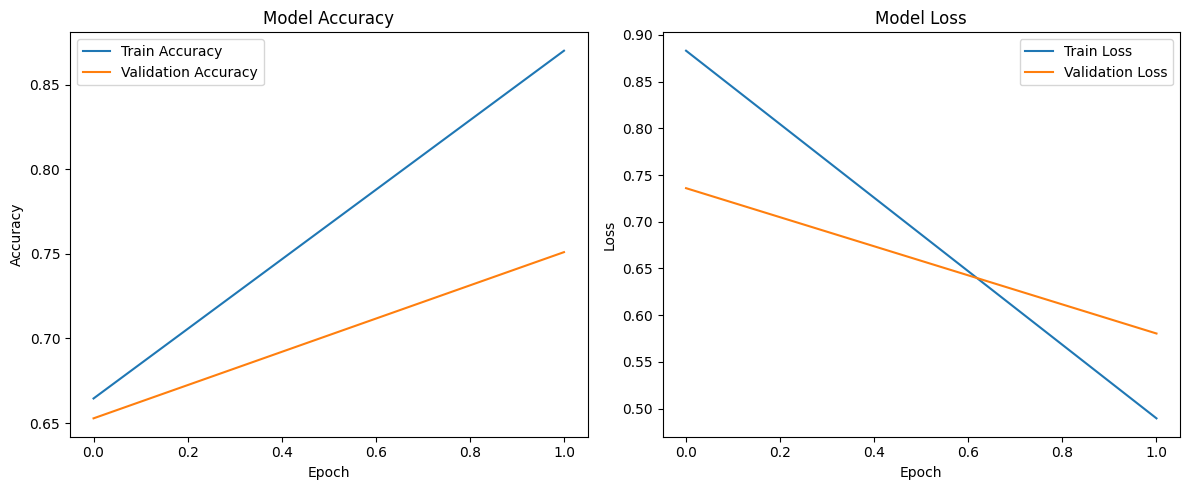

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
Accuracy: 0.7735042735042735
Precision: 0.5201393641193465
Recall: 0.48641809974384004


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


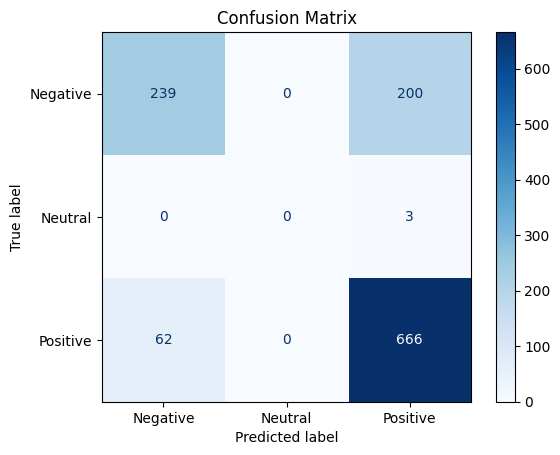

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative","Neutral", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:


new_text = "India to sanction technocrat"
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=25)

predicted_probabilities = model.predict(padded_sequence)
predicted_label = np.argmax(predicted_probabilities)

label_mapping = {2: "positive", 1: "neutral", 0: "negative"}
predicted_sentiment = label_mapping[predicted_label]

print(f"Text: {new_text}")
print(f"Predicted Sentiment: {predicted_sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Text: India to sanction technocrat
Predicted Sentiment: positive
